# Étape 1: Identification des Features Pertinentes

In [49]:
# Importation des bibliothèques
import pandas as pd
import numpy as np

In [50]:
# Chargement du fichier CSV
df = pd.read_csv('fr.openfoodfacts.org.products.csv', encoding='utf-8', sep='\t', low_memory=False)

In [51]:
# Affichage des premières lignes
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Note sur le RGPD
Ce projet utilise un dataset public provenant de Open Food Facts, qui ne contient pas de données personnelles. Par conséquent, ce projet n'est pas soumis aux réglementations du RGPD (Règlement Général sur la Protection des Données). Cependant, nous avons veillé à respecter les grands principes du RGPD, tels que :
-  la licéité 
-   la transparence, 
-   la limitation de la finalité et des données,
-  l'exactitude et 
-    la limitation de la conservation, 

en utilisant des données publiques pertinentes pour notre analyse et en traitant les valeurs manquantes et aberrantes pour assurer leur qualité.



In [52]:
# Examen des colonnes et de leur type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [53]:
# Sélection des colonnes pertinentes
colonnes_pertinentes = [
    'code', 'product_name', 'brands', 'categories', 'additives_n',
    'nutrition-score-fr_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
    'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g',
    'pnns_groups_1', 'pnns_groups_2'
]
# Création d'un nouveau DataFrame avec les colonnes pertinentes
df_selected = df[colonnes_pertinentes].copy()

## Conclusion de l'étape 1 : Identification des features pertinentes

Dans cette étape, nous avons identifié les features pertinentes pour notre analyse en sélectionnant les colonnes d'intérêt. Cela nous a permis de nous concentrer sur les informations les plus importantes pour notre étude.


# Étape 2: Compréhension des colonnes pour l'harmonisation

In [54]:
# Affichage des valeurs uniques pour 'pnns_groups_1' et 'pnns_groups_2'
print("Valeurs uniques dans pnns_groups_1 :")
print(df_selected['pnns_groups_1'].unique())
print("\nValeurs uniques dans pnns_groups_2 :")
print(df_selected['pnns_groups_2'].unique())

Valeurs uniques dans pnns_groups_1 :
[nan 'unknown' 'Fruits and vegetables' 'Sugary snacks'
 'Cereals and potatoes' 'Composite foods' 'Fish Meat Eggs' 'Beverages'
 'Fat and sauces' 'fruits-and-vegetables' 'Milk and dairy products'
 'Salty snacks' 'sugary-snacks' 'cereals-and-potatoes' 'salty-snacks']

Valeurs uniques dans pnns_groups_2 :
[nan 'unknown' 'Vegetables' 'Biscuits and cakes' 'Bread' 'Legumes'
 'Pizza pies and quiche' 'Meat' 'Sweets' 'Non-sugared beverages'
 'Sweetened beverages' 'Dressings and sauces' 'One-dish meals'
 'vegetables' 'Soups' 'Chocolate products' 'Alcoholic beverages' 'Fruits'
 'Sandwich' 'Cereals' 'Milk and yogurt' 'Fats' 'Cheese' 'Appetizers'
 'Nuts' 'Breakfast cereals' 'Artificially sweetened beverages'
 'Fruit juices' 'Eggs' 'Fish and seafood' 'Dried fruits' 'Ice cream'
 'Processed meat' 'Potatoes' 'Dairy desserts' 'Fruit nectars' 'pastries'
 'Tripe dishes' 'fruits' 'Salty and fatty products' 'cereals' 'legumes'
 'nuts']


In [55]:
# Suppression de la colonne 'pnns_groups_2'
df_selected = df_selected.drop('pnns_groups_2', axis=1)

df_step2 = df_selected

## Conclusion de l'étape 2 : Compréhension des colonnes pour l'harmonisation

Nous avons examiné les valeurs uniques dans les colonnes 'pnns_groups_1' et 'pnns_groups_2' pour comprendre les différentes catégories de produits. Nous avons décidé de supprimer la colonne 'pnns_groups_2' car elle n'était pas nécessaire pour notre analyse.


# Étape 3: Identification des valeurs manquantes

In [56]:
# Calcul du pourcentage de valeurs manquantes pour chaque colonne
pourcentage_valeurs_manquantes = df_step2.isna().mean() * 100
print(pourcentage_valeurs_manquantes)

# Sélection des colonnes avec moins de 50% de valeurs manquantes
colonnes_moins_50_pourcent_manquantes = pourcentage_valeurs_manquantes[pourcentage_valeurs_manquantes < 50].index

# Ajout de la colonne 'pnns_groups_1' à la liste des colonnes à conserver
colonnes_a_conserver = colonnes_moins_50_pourcent_manquantes.tolist() + ['pnns_groups_1']

code                        0.007170
product_name                5.537266
brands                      8.857382
categories                 73.685359
additives_n                22.393787
nutrition-score-fr_100g    31.038245
energy_100g                18.598568
fat_100g                   23.967491
saturated-fat_100g         28.437021
carbohydrates_100g         24.061951
sugars_100g                23.630803
proteins_100g              18.969860
salt_100g                  20.345292
pnns_groups_1              71.471014
dtype: float64


In [57]:
# Mise à jour de 'df_step2' pour conserver uniquement les colonnes sélectionnées
df_step2 = df_step2[colonnes_a_conserver]

# Suppression des lignes où 'product_name' ou 'code' est vide ou null
df_step2 = df_step2.dropna(subset=['product_name', 'code'], how='any').reset_index(drop=True)

# Création d'une copie pour l'étape suivante
df_step3 = df_step2

## Conclusion de l'étape 3 : Identification des valeurs manquantes

Nous avons calculé le pourcentage de valeurs manquantes pour chaque colonne et avons sélectionné les colonnes ayant moins de 50% de valeurs manquantes. Cela nous a permis de travailler avec des données plus complètes et fiables.


# Étape 4: Élimination des doublons

In [58]:
# Identification des doublons pour la colonne 'code'
doublons = df_step3.duplicated(subset='code', keep=False)

# Suppression des doublons en gardant la première occurrence
df_step3.drop_duplicates(subset='code', keep='first', inplace=True)

In [59]:
# Vérification qu'il ne reste plus de doublons
print("Nombre de doublons restants :", df_step3.duplicated(subset='code').sum())

# Création d'une copie pour l'étape suivante
df_step4 = df_step3

Nombre de doublons restants : 0


## Conclusion de l'étape 4 : Élimination des doublons

Nous avons identifié et supprimé les doublons dans notre dataset en utilisant la colonne 'code' comme référence. Cela a assuré que chaque produit n'était représenté qu'une seule fois dans notre analyse.


# Étape 5: Traitement des valeurs aberrantes


In [60]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [61]:
# Définition des colonnes nutritionnelles et des seuils
colonnes_nutritionnelles = [
    'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
    'sugars_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g'
]

seuils = {
    'energy_100g': (0, 3500),
    'fat_100g': (0, 100),
    'saturated-fat_100g': (0, 100),
    'carbohydrates_100g': (0, 100),
    'sugars_100g': (0, 100),
    'proteins_100g': (0, 100),
    'salt_100g': (0, 100),
    'nutrition-score-fr_100g': (-15, 40)
}

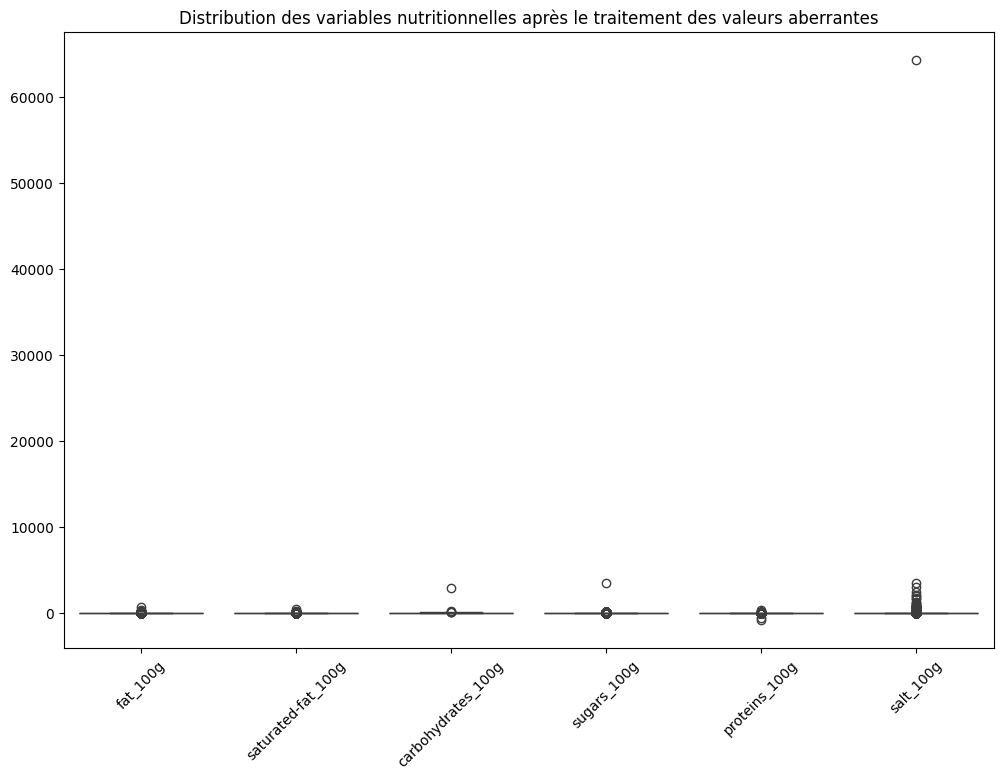

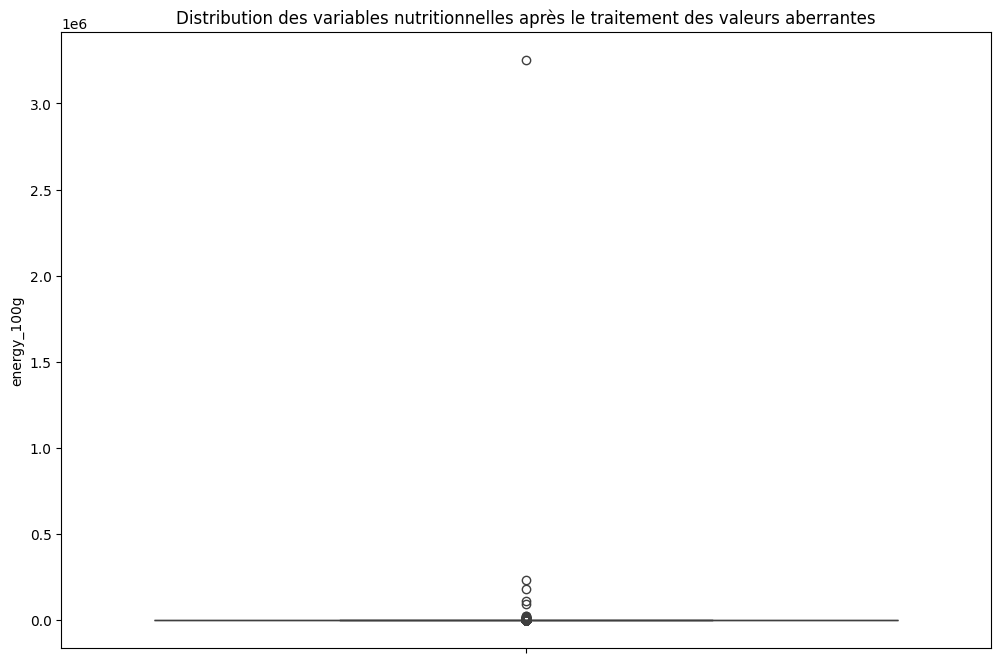

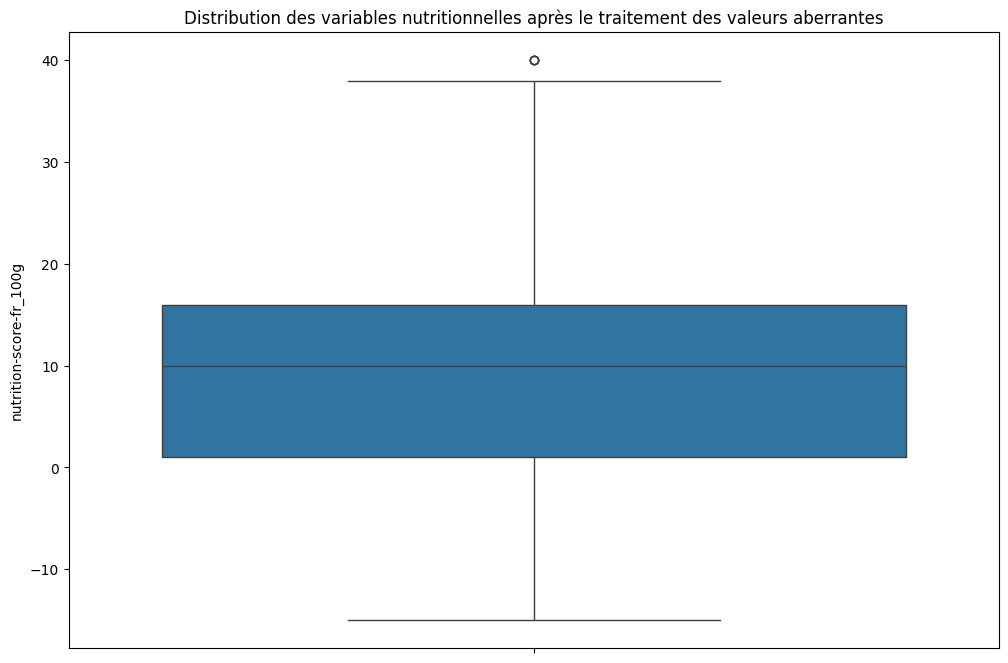

In [62]:

colonnes_nutritionnelles_100g = [
     'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
    'sugars_100g', 'proteins_100g', 'salt_100g',
]
# Visualisation des valeurs aberrantes avant le traitement
plt.figure(figsize=(12, 8))  # Vous pouvez ajuster la taille selon le nombre de colonnes
sns.boxplot(data=df_step4[colonnes_nutritionnelles_100g])
plt.xticks(rotation=45)  # Rotation des noms des colonnes pour une meilleure lisibilité
plt.title("Distribution des variables nutritionnelles après le traitement des valeurs aberrantes")
plt.show()

# Visualisation des valeurs aberrantes avant le traitement pour energy_100g
plt.figure(figsize=(12, 8))  # Vous pouvez ajuster la taille selon le nombre de colonnes
sns.boxplot(data=df_step4['energy_100g'])
plt.xticks(rotation=45)  # Rotation des noms des colonnes pour une meilleure lisibilité
plt.title("Distribution des variables nutritionnelles après le traitement des valeurs aberrantes")
plt.show()

# Visualisation des valeurs aberrantes avant le traitement pour nutrition-score-fr_100g
plt.figure(figsize=(12, 8))  # Vous pouvez ajuster la taille selon le nombre de colonnes
sns.boxplot(data=df_step4['nutrition-score-fr_100g'])
plt.xticks(rotation=45)  # Rotation des noms des colonnes pour une meilleure lisibilité
plt.title("Distribution des variables nutritionnelles après le traitement des valeurs aberrantes")
plt.show()

In [63]:
# Remplacement des valeurs aberrantes par la médiane des valeurs non aberrantes
for col in colonnes_nutritionnelles:
    seuil_min, seuil_max = seuils[col]
    valeurs_aberrantes = (df_step4[col] < seuil_min) | (df_step4[col] > seuil_max)
    valeurs_non_aberrantes = ~valeurs_aberrantes
    mediane_non_aberrantes = df_step4.loc[valeurs_non_aberrantes, col].median()
    df_step4.loc[valeurs_aberrantes, col] = mediane_non_aberrantes

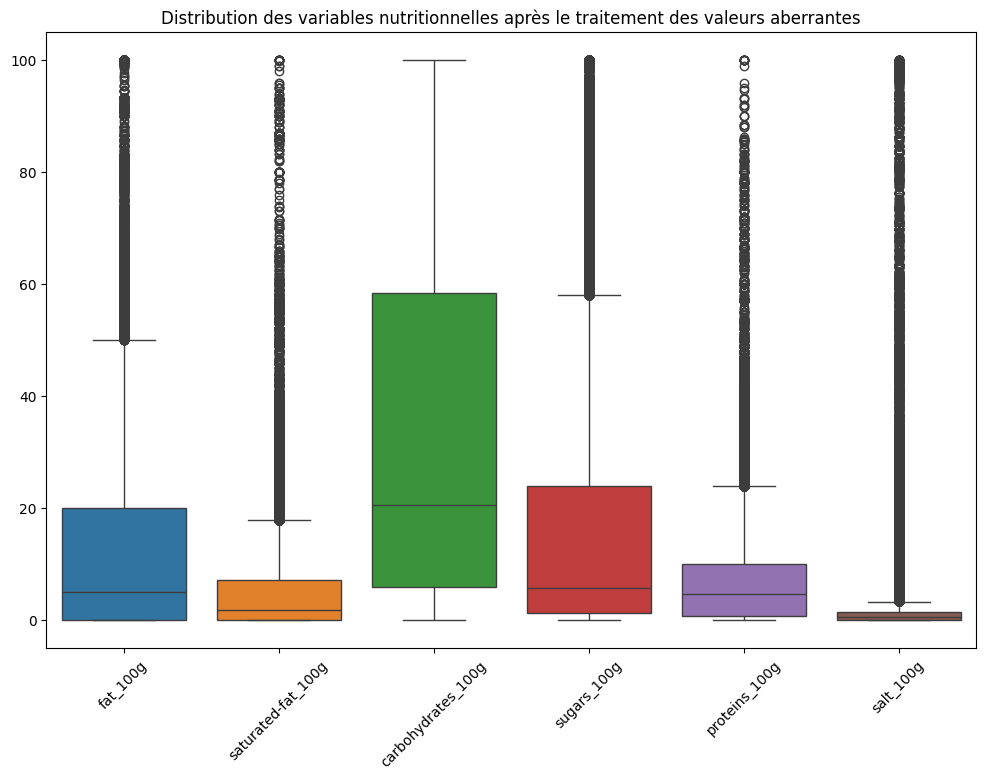

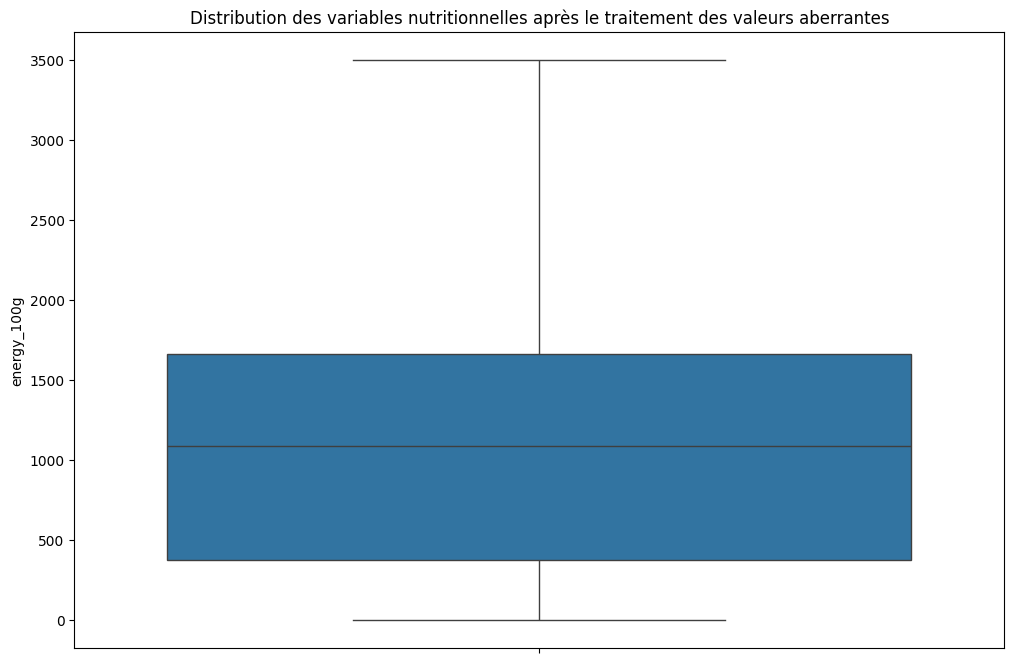

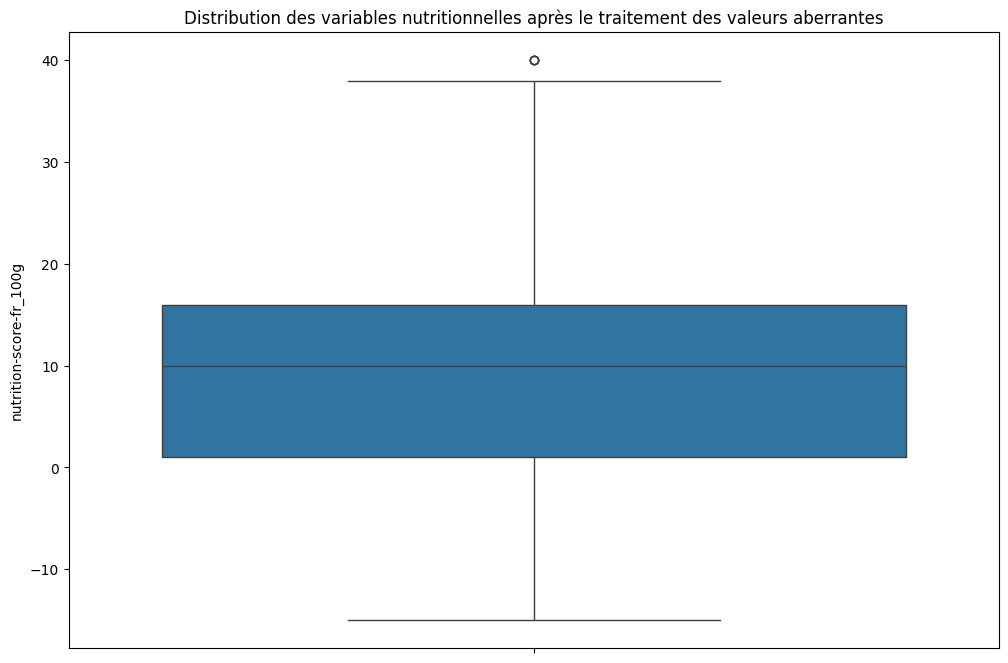

In [64]:

colonnes_nutritionnelles_100g = [
     'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
    'sugars_100g', 'proteins_100g', 'salt_100g',
]
# Visualisation des valeurs aberrantes après le traitement
plt.figure(figsize=(12, 8))  # Vous pouvez ajuster la taille selon le nombre de colonnes
sns.boxplot(data=df_step4[colonnes_nutritionnelles_100g])
plt.xticks(rotation=45)  # Rotation des noms des colonnes pour une meilleure lisibilité
plt.title("Distribution des variables nutritionnelles après le traitement des valeurs aberrantes")
plt.show()

# Visualisation des valeurs aberrantes après le traitement pour energy_100g
plt.figure(figsize=(12, 8))  # Vous pouvez ajuster la taille selon le nombre de colonnes
sns.boxplot(data=df_step4['energy_100g'])
plt.xticks(rotation=45)  # Rotation des noms des colonnes pour une meilleure lisibilité
plt.title("Distribution des variables nutritionnelles après le traitement des valeurs aberrantes")
plt.show()

# Visualisation des valeurs aberrantes après le traitement pour nutrition-score-fr_100g
plt.figure(figsize=(12, 8))  # Vous pouvez ajuster la taille selon le nombre de colonnes
sns.boxplot(data=df_step4['nutrition-score-fr_100g'])
plt.xticks(rotation=45)  # Rotation des noms des colonnes pour une meilleure lisibilité
plt.title("Distribution des variables nutritionnelles après le traitement des valeurs aberrantes")
plt.show()

In [65]:
df_step4.describe()

,additives_n,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
count,247091.000000,218463.000000,257773.000000,240584.000000,226641.000000,240276.000000,241910.000000,256605.000000,252527.000000
mean,1.937748,9.151724,1106.584014,12.696067,5.111605,32.072159,15.974452,7.077809,1.592814
std,2.503582,9.052588,769.313345,17.497796,7.906111,29.166156,21.169157,8.163187,6.259444
min,0.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,373.000000,0.000000,0.000000,6.000000,1.300000,0.700000,0.063500
50%,1.000000,10.000000,1088.000000,5.000000,1.790000,20.590000,5.710000,4.760000,0.584200
75%,3.000000,16.000000,1660.000000,20.000000,7.140000,58.440000,24.000000,10.000000,1.371600
max,31.000000,40.000000,3498.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [66]:
# Traitement des valeurs aberrantes pour 'additives_n'
df_step4['additives_n'] = df_step4['additives_n'].apply(lambda x: np.nan if x < 0 else x)

# Création d'une copie pour l'étape suivante
df_step5 = df_step4

## Conclusion de l'étape 5 : Traitement des valeurs aberrantes

Nous avons visualisé les valeurs aberrantes pour chaque feature numérique à l'aide de boxplots. Ensuite, nous avons remplacé ces valeurs aberrantes par la médiane des valeurs non aberrantes pour chaque colonne. Cette étape a contribué à rendre notre dataset plus cohérent et à réduire l'impact des valeurs extrêmes sur notre analyse.


# Étape 6: Imputation itérative pour gérer les valeurs manquantes

In [67]:
# Importation des bibliothèques nécessaires
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.exceptions import ConvergenceWarning
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes numériques pour l'imputation
colonnes_imputation = [
    'additives_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
    'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g'
]


In [68]:
# Fonction pour créer un imputer avec un estimateur donné
def create_imputer(estimator, random_state=42, max_iter=100, tol=1e-5, initial_strategy='median'):
    return IterativeImputer(estimator=estimator,
                             random_state=random_state,
                             max_iter=max_iter,
                             tol=tol,
                             initial_strategy=initial_strategy)



In [69]:
# Définition des bornes pour chaque colonne
bornes = {
    'additives_n': (0, None),
    'energy_100g': (0, 3500),
    'fat_100g': (0, 100),
    'saturated-fat_100g': (0, 100),
    'carbohydrates_100g': (0, 100),
    'sugars_100g': (0, 100),
    'proteins_100g': (0, 100),
    'salt_100g': (0, 100)
}

In [70]:
# Création d'un imputer avec LinearRegression et bornes
imputer = create_imputer(LinearRegression())
min_values = [bornes[col][0] for col in colonnes_imputation]
max_values = [bornes[col][1] if bornes[col][1] is not None else np.inf for col in colonnes_imputation]
imputer.set_params(max_iter=100,
                   random_state=42,
                   min_value=min_values,
                   max_value=max_values)

# Suppression des avertissements pour l'imputation itérative
warnings.filterwarnings('ignore', category=ConvergenceWarning)

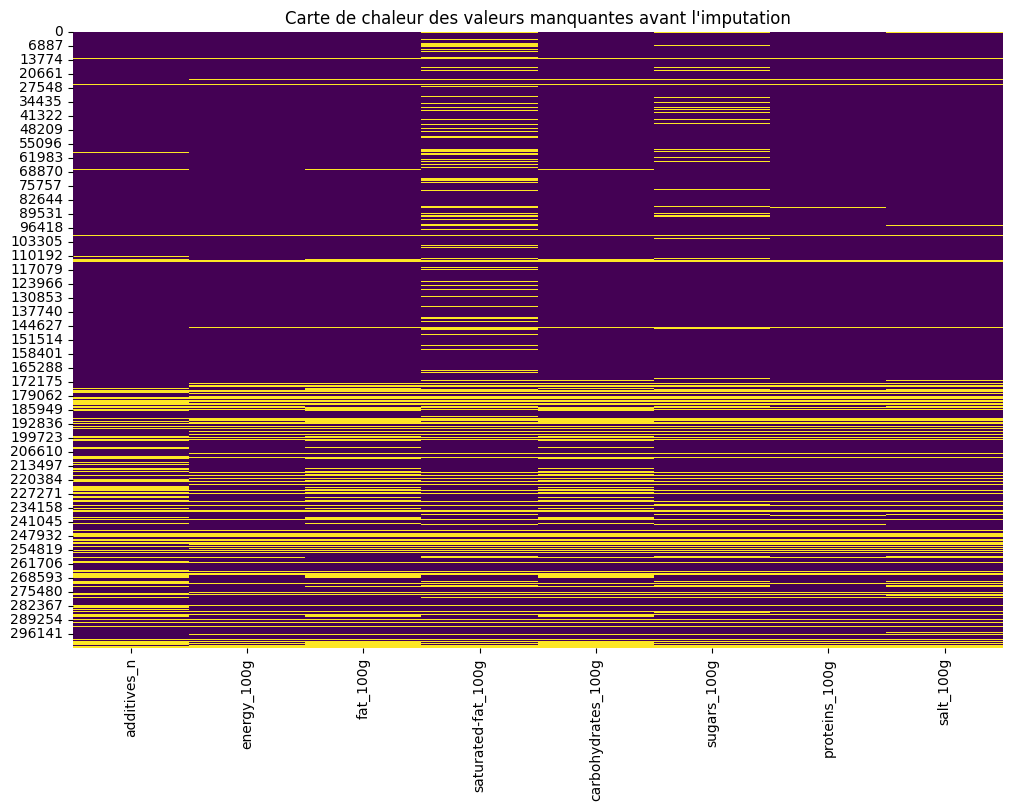

In [71]:
# Visualisation des données avant l'imputation
plt.figure(figsize=(12, 8))
sns.heatmap(df_step5[colonnes_imputation].isna(), cmap='viridis', cbar=False)
plt.title("Carte de chaleur des valeurs manquantes avant l'imputation")
plt.show()


In [72]:
# Application de l'imputation
df_step5[colonnes_imputation] = imputer.fit_transform(df_step5[colonnes_imputation])


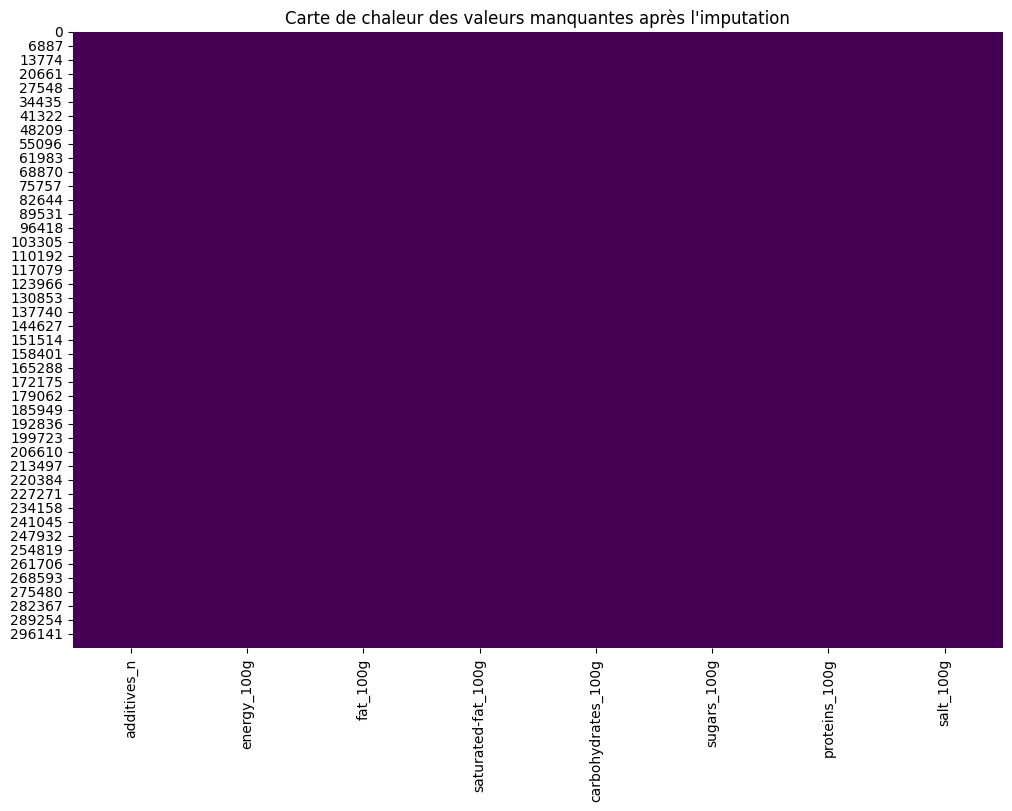

In [73]:
# Visualisation des données après l'imputation
plt.figure(figsize=(12, 8))
sns.heatmap(df_step5[colonnes_imputation].isna(), cmap='viridis', cbar=False)
plt.title("Carte de chaleur des valeurs manquantes après l'imputation")
plt.show()

In [74]:
# Création d'une copie pour l'étape suivante
df_step6 = df_step5


## Conclusion de l'étape 6 : Imputation itérative pour gérer les valeurs manquantes

Nous avons utilisé l'imputation itérative avec l'estimateur LinearRegression pour estimer les valeurs manquantes dans notre dataset. Nous avons également défini des bornes pour chaque colonne afin de nous assurer que les valeurs imputées étaient plausibles. Cette étape nous a permis d'obtenir un dataset complet sans valeurs manquantes.


# Étape 7: Traitement des valeurs manquantes avec SimpleImputer

In [75]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

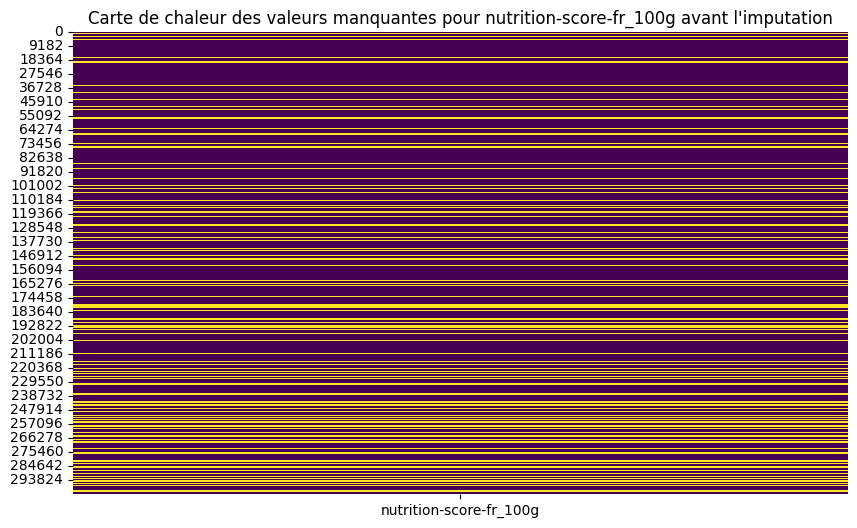

In [76]:
# Sélection de la colonne 'nutrition-score-fr_100g'
col_imputer = 'nutrition-score-fr_100g'

# Visualisation des valeurs manquantes avant l'imputation
plt.figure(figsize=(10, 6))
sns.heatmap(df_step6[[col_imputer]].isna(), cmap='viridis', cbar=False)
plt.title(f"Carte de chaleur des valeurs manquantes pour {col_imputer} avant l'imputation")
plt.show()

In [77]:
# Création de l'imputer SimpleImputer avec une stratégie médiane
imputer_median = SimpleImputer(strategy='median')

# Imputation des valeurs manquantes
df_step6[col_imputer] = imputer_median.fit_transform(df_step6[[col_imputer]])

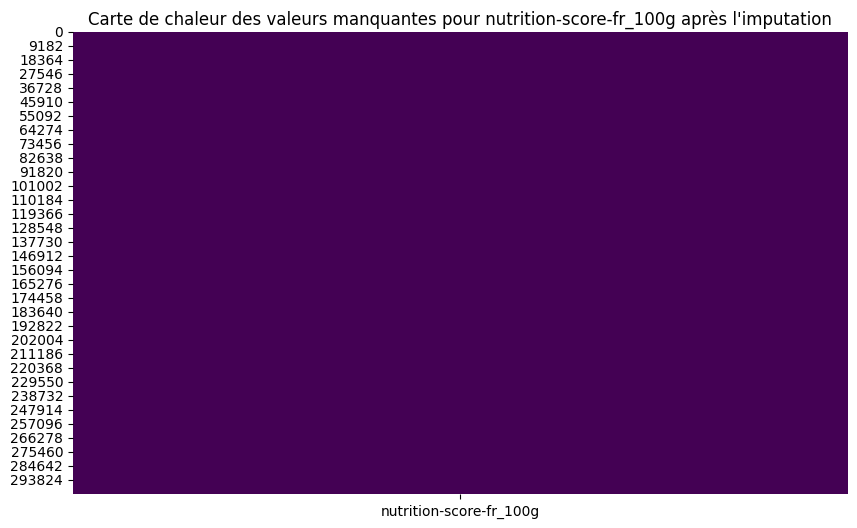

In [78]:
# Visualisation des valeurs manquantes après l'imputation
plt.figure(figsize=(10, 6))
sns.heatmap(df_step6[[col_imputer]].isna(), cmap='viridis', cbar=False)
plt.title(f"Carte de chaleur des valeurs manquantes pour {col_imputer} après l'imputation")
plt.show()

# Création d'une copie pour l'étape suivante
df_step7 = df_step6

## Conclusion de l'étape 7 : Traitement des valeurs manquantes avec SimpleImputer

Pour la colonne `nutrition-score-fr_100g`, nous avons utilisé SimpleImputer avec une stratégie de médiane pour imputer les valeurs manquantes. Cela a complété notre dataset et nous a permis d'utiliser cette colonne dans notre analyse.


# Étape 8: Analyse univariée


In [79]:
# Étape 8: Analyse univariée

# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes pertinentes pour l'analyse univariée
colonnes_pertinentes = [
    'additives_n', 'nutrition-score-fr_100g', 'fat_100g', 'saturated-fat_100g',
    'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'energy_100g'
]

# Statistiques descriptives des features numériques
print("Statistiques descriptives des features numériques:")
print(df_step7[colonnes_pertinentes].describe())


Statistiques descriptives des features numériques:
         additives_n  nutrition-score-fr_100g       fat_100g  \
count  302987.000000            302987.000000  302987.000000   
mean        1.932485                 9.388366      12.795583   
std         2.265117                 7.696277      16.053823   
min         0.000000               -15.000000       0.000000   
25%         0.000000                 3.000000       0.430000   
50%         1.850114                10.000000       9.460000   
75%         2.238883                14.000000      17.140000   
max        31.000000                40.000000     100.000000   

       saturated-fat_100g  carbohydrates_100g    sugars_100g  proteins_100g  \
count       302987.000000       302987.000000  302987.000000  302987.000000   
mean             4.725985           31.714011      15.367269       7.094371   
std              6.973284           26.626829      19.236678       7.522878   
min              0.000000            0.000000       0.00

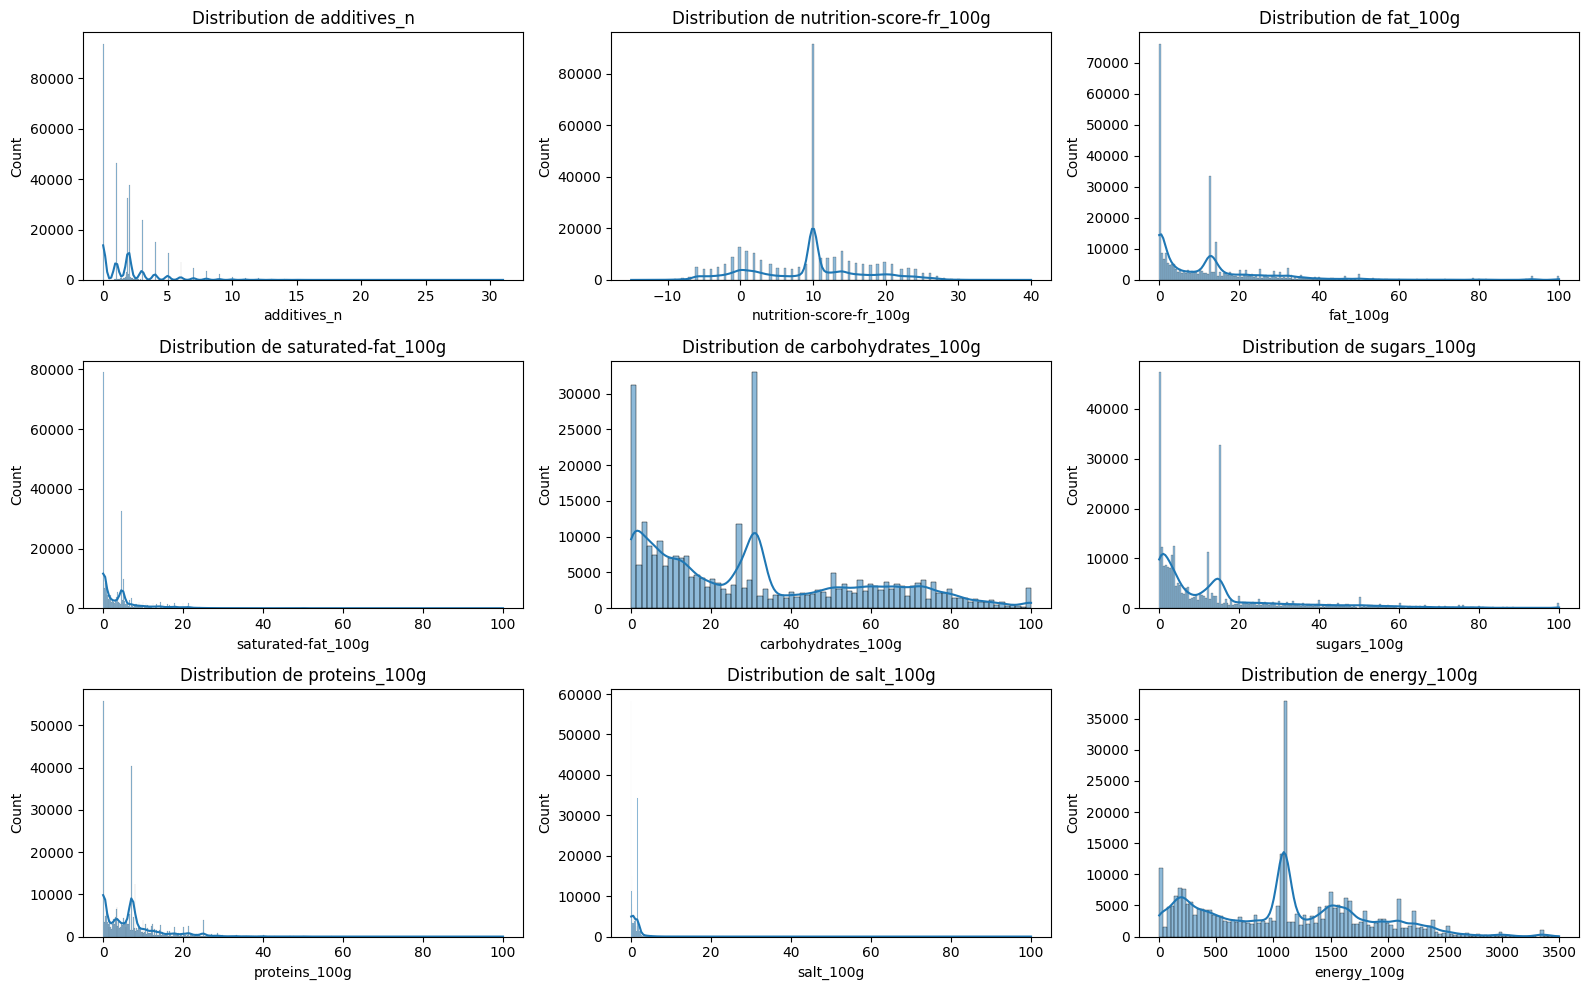

In [80]:

# Graphiques de distribution pour les features numériques
plt.figure(figsize=(16, 10))
for i, col in enumerate(colonnes_pertinentes, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_step7, x=col, kde=True)
    plt.title(f"Distribution de {col}")
plt.tight_layout()
plt.show()



### Interprétation des graphiques de distribution pour les features numériques

Les graphiques de distribution montrent la répartition des valeurs pour chaque feature numérique. On peut voir que certaines features, comme `fat_100g`, `saturated-fat_100g`, `sugars_100g` et `salt_100g`, ont une distribution asymétrique avec une longue queue vers la droite, ce qui indique la présence de valeurs élevées pour certains produits. D'autres features, comme `energy_100g`, `carbohydrates_100g` et `proteins_100g`, ont une distribution plus symétrique et centrée.

Nombre de produits par groupe alimentaire (pnns_groups_1):
pnns_groups_1
unknown                    20154
Sugary snacks              12267
Beverages                   8898
Milk and dairy products     8774
Cereals and potatoes        8376
Fish Meat Eggs              7984
Composite foods             6725
Fruits and vegetables       5870
Fat and sauces              5164
Salty snacks                2789
fruits-and-vegetables        986
sugary-snacks                494
cereals-and-potatoes          16
salty-snacks                   1
Name: count, dtype: int64


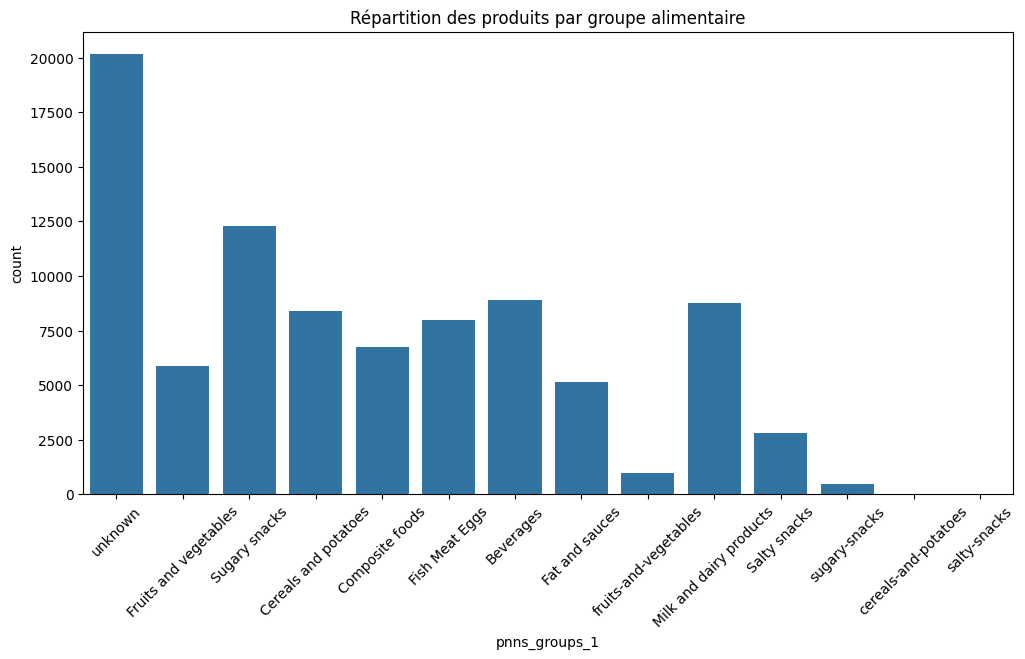

In [81]:
# Analyse univariée de la feature catégorielle 'pnns_groups_1'
print("Nombre de produits par groupe alimentaire (pnns_groups_1):")
print(df_step7['pnns_groups_1'].value_counts())

# Barplot pour la répartition des produits par groupe alimentaire
plt.figure(figsize=(12, 6))
sns.countplot(data=df_step7, x='pnns_groups_1')
plt.xticks(rotation=45)
plt.title('Répartition des produits par groupe alimentaire')
plt.show()

# Création d'une copie pour l'étape suivante
df_step8 = df_step7

### Interprétation du barplot pour la répartition des produits par groupe alimentaire

Le barplot montre la répartition des produits dans différents groupes alimentaires selon la colonne `pnns_groups_1`. On peut voir que certains groupes, comme "unknown", "Sugary snacks", "Beverages" et "Milk and dairy products", ont plus de produits que d'autres. Cela nous donne une idée de la représentativité de chaque groupe alimentaire dans le dataset.

## Conclusion de l'étape 8 : Analyse univariée

Dans cette étape, nous avons réalisé une analyse univariée en examinant les statistiques descriptives, les graphiques de distribution et les barplots pour les features numériques et catégorielles. Cela nous a donné un aperçu de la distribution et des caractéristiques de chaque feature dans notre dataset.


# Étape 9: Analyse bivariée


In [82]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

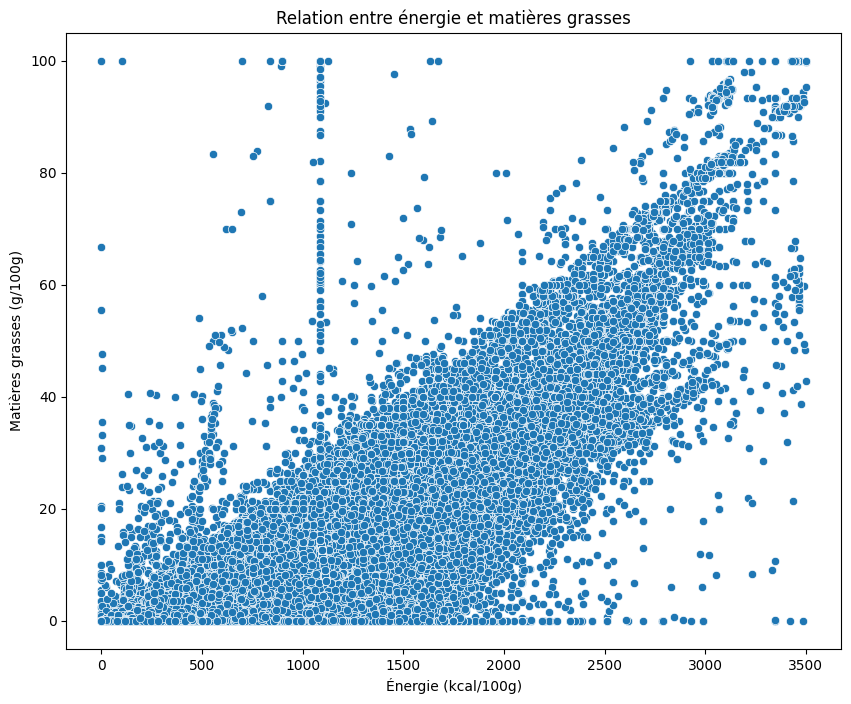

In [83]:
# Scatterplot entre 'energy_100g' et 'fat_100g'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_step8, x='energy_100g', y='fat_100g')
plt.xlabel('Énergie (kcal/100g)')
plt.ylabel('Matières grasses (g/100g)')
plt.title('Relation entre énergie et matières grasses')
plt.show()

### Interprétation du scatterplot entre `energy_100g` et `fat_100g`

Le scatterplot montre la relation entre l'énergie (en kcal/100g) et les matières grasses (en g/100g) des produits. On peut voir une tendance positive, ce qui suggère que les produits avec plus d'énergie ont généralement plus de matières grasses. Cependant, il y a aussi une dispersion importante des points, ce qui indique des variations dans cette relation.

<Figure size 1200x1000 with 0 Axes>

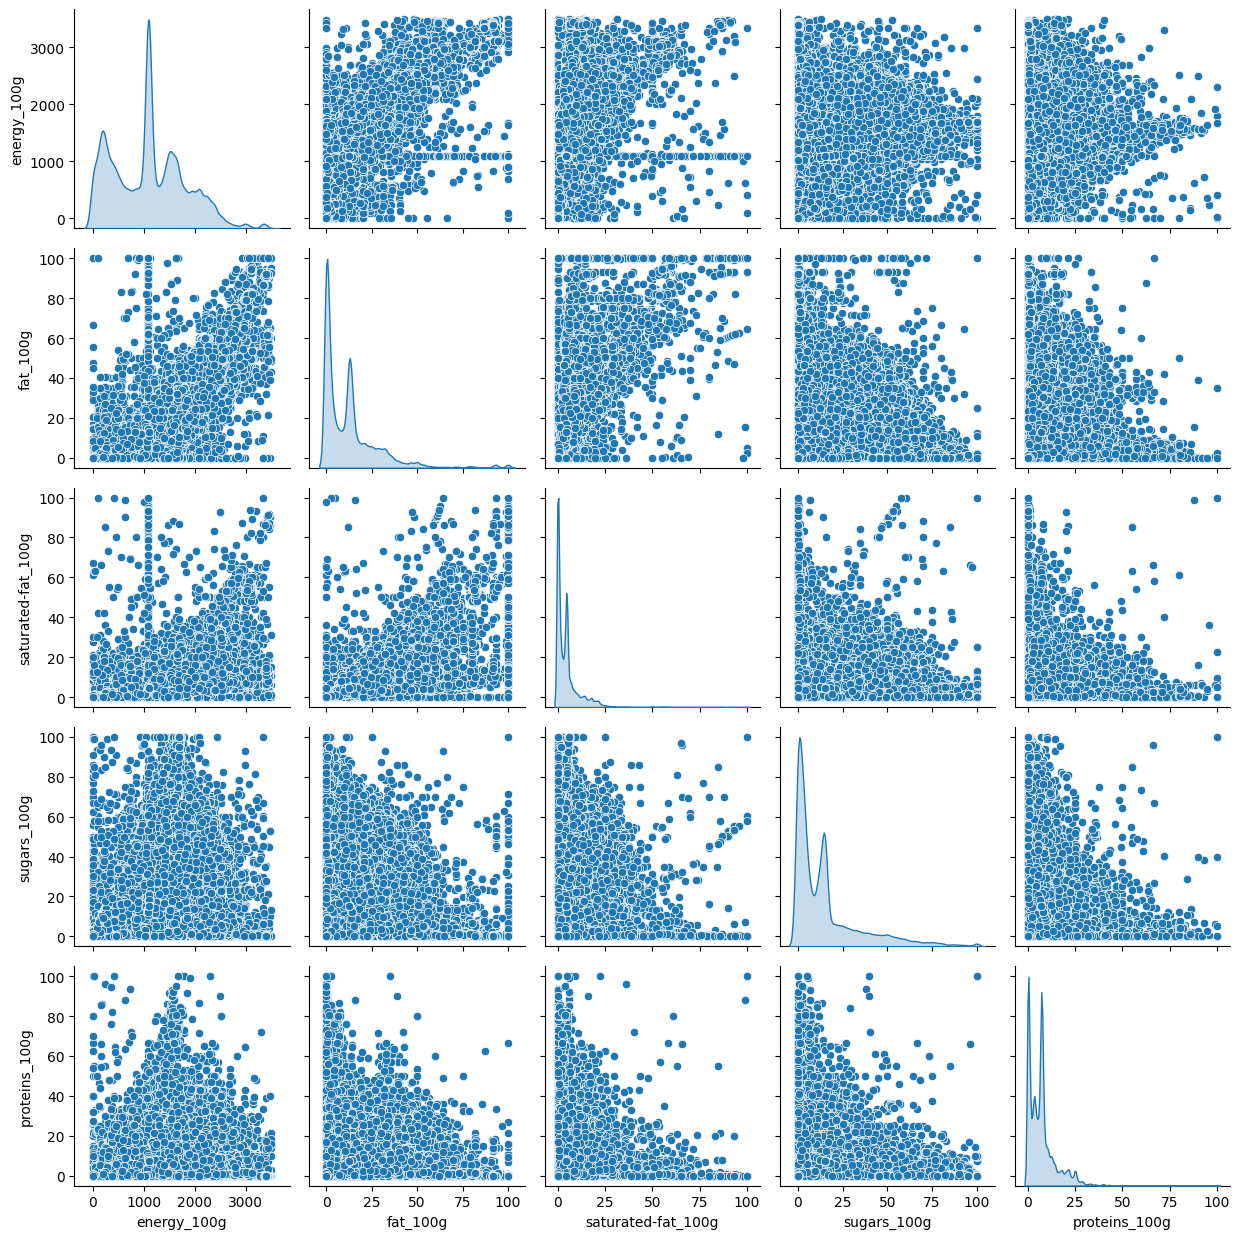

In [84]:
# Sélection des colonnes pour le pairplot
colonnes_pairplot = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g']

# Création du pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df_step8[colonnes_pairplot], diag_kind='kde')
plt.tight_layout()
plt.show()

### Interprétation du pairplot des features numériques sélectionnées

Le pairplot montre les relations entre différentes paires de features numériques. On peut voir des relations positives entre certaines features, comme `energy_100g` et `fat_100g`, `energy_100g` et `saturated-fat_100g`, ainsi qu'entre `fat_100g` et `saturated-fat_100g`. D'autres paires de features ne semblent pas avoir de relation claire, comme `proteins_100g` et `sugars_100g`.

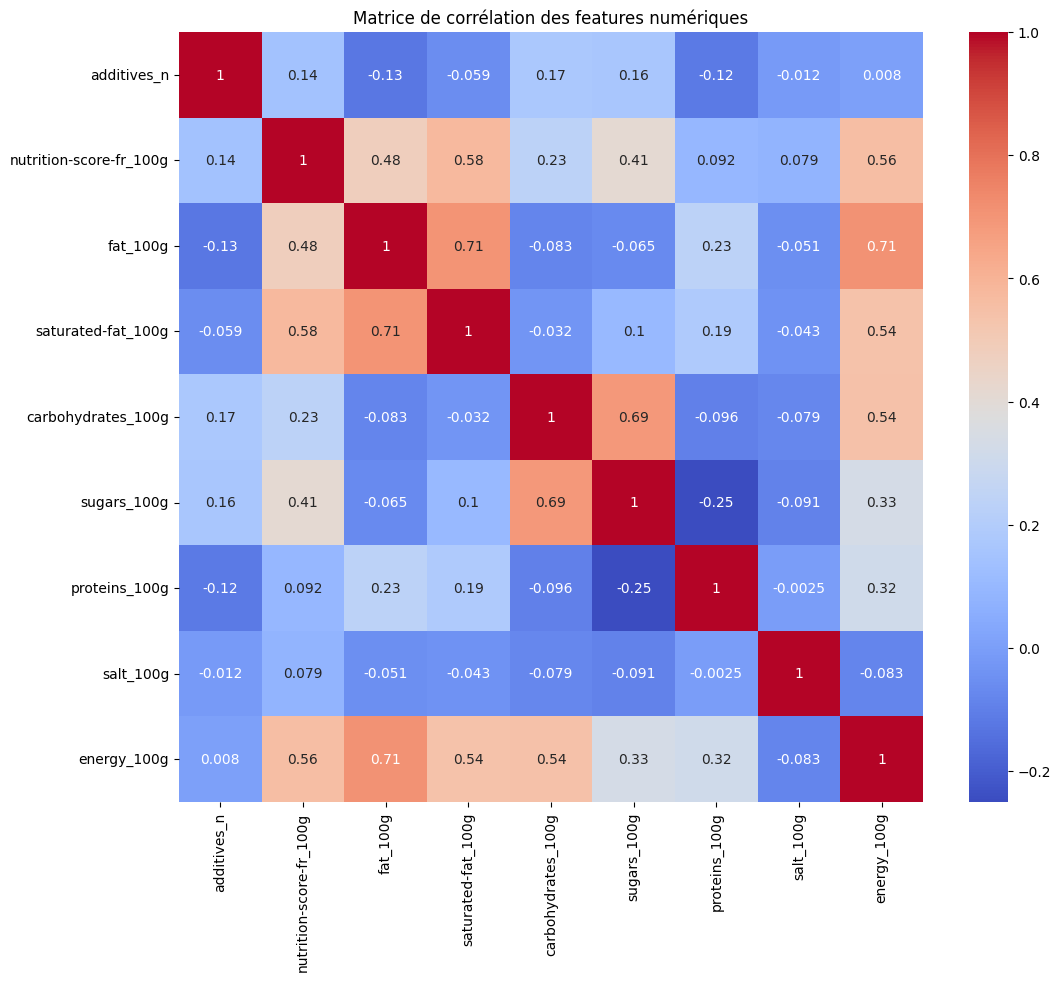

In [85]:
# Calcul de la matrice de corrélation
matrice_corr = df_step8[colonnes_pertinentes].corr()

# Création de la heatmap de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des features numériques')
plt.show()

### Interprétation de la heatmap de corrélation des features numériques

La heatmap de corrélation montre les corrélations entre toutes les paires de features numériques. On peut voir des corrélations positives fortes entre certaines features, comme `fat_100g` et `saturated-fat_100g`, `carbohydrates_100g` et `sugars_100g`. D'autres paires de features ont des corrélations plus faibles ou négatives. Cela nous aide à identifier les features fortement corrélées qui pourraient fournir des informations similaires dans l'analyse.

In [86]:
# Création de la colonne 'nutriscore' basée sur 'nutrition-score-fr_100g'
def get_nutriscore(score):
    if score <= -1:
        return 'A'
    elif score <= 2:
        return 'B'
    elif score <= 10:
        return 'C'
    elif score <= 18:
        return 'D'
    else:
        return 'E'

df_step8['nutriscore'] = df_step8['nutrition-score-fr_100g'].apply(get_nutriscore)

In [87]:
# Vérification des valeurs aberrantes après le traitement

# Définition des seuils pour les différentes colonnes
seuils = {
    'energy_100g': (0, 3500),
    'fat_100g': (0, 100),
    'saturated-fat_100g': (0, 100),
    'carbohydrates_100g': (0, 100),
    'sugars_100g': (0, 100),
    'proteins_100g': (0, 100),
    'salt_100g': (0, 100),
    'nutrition-score-fr_100g': (-15, 40)
}

# Fonction pour vérifier les valeurs aberrantes
def check_outliers(df, col, seuil_min, seuil_max):
    valeurs_aberrantes = (df[col] < seuil_min) | (df[col] > seuil_max)
    if valeurs_aberrantes.sum() > 0:
        print(f"Attention ! Il y a encore des valeurs aberrantes pour {col}:")
        print(df.loc[valeurs_aberrantes, col])
    else:
        print(f"Aucune valeur aberrante détectée pour {col}")

# Vérification des valeurs aberrantes pour chaque colonne
for col, seuils in seuils.items():
    seuil_min, seuil_max = seuils
    check_outliers(df_step7, col, seuil_min, seuil_max)

Aucune valeur aberrante détectée pour energy_100g
Aucune valeur aberrante détectée pour fat_100g
Aucune valeur aberrante détectée pour saturated-fat_100g
Aucune valeur aberrante détectée pour carbohydrates_100g
Aucune valeur aberrante détectée pour sugars_100g
Aucune valeur aberrante détectée pour proteins_100g
Aucune valeur aberrante détectée pour salt_100g
Aucune valeur aberrante détectée pour nutrition-score-fr_100g


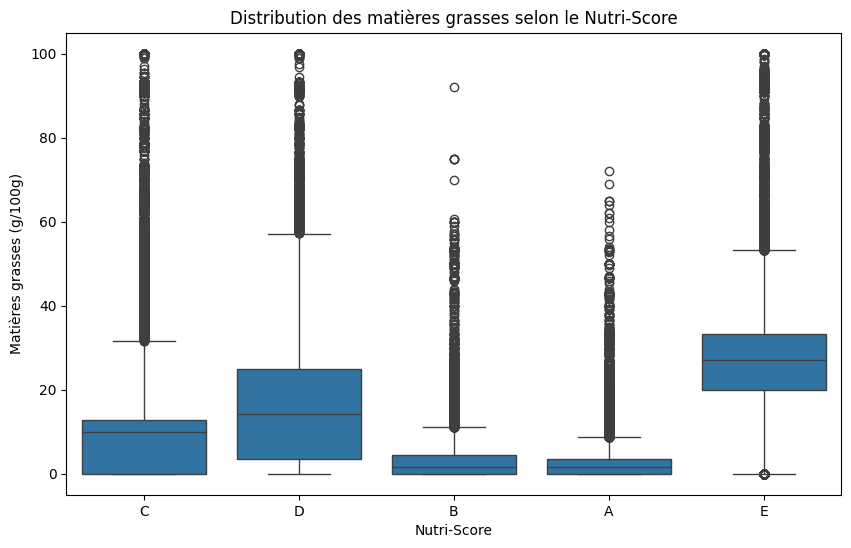

In [88]:
# Boxplot de 'fat_100g' selon 'nutriscore'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_step8, x='nutriscore', y='fat_100g')
plt.xlabel('Nutri-Score')
plt.ylabel('Matières grasses (g/100g)')
plt.title('Distribution des matières grasses selon le Nutri-Score')
plt.show()

### Interprétation du boxplot de 'fat_100g' selon 'nutriscore'

Le boxplot compare la distribution des matières grasses (en g/100g) selon les différentes catégories de Nutri-Score. On peut voir que les produits avec un Nutri-Score 'A' et 'B' ont tendance à avoir moins de matières grasses que les produits avec un Nutri-Score 'D' et 'E'. Cela suggère un lien entre la qualité nutritionnelle globale des produits (représentée par le Nutri-Score) et leur teneur en matières grasses.

In [89]:
df_step9=df_step8

## Conclusion de l'étape 9 : Analyse bivariée

Nous avons effectué une analyse bivariée en créant des scatterplots, des pairplots et une heatmap de corrélation pour examiner les relations entre différentes paires de features numériques. Nous avons également créé une nouvelle colonne 'nutriscore' basée sur `nutrition-score-fr_100g` pour faciliter l'analyse. Cette étape nous a permis de mieux comprendre les interactions entre les features et leur lien avec le Nutri-Score.


# Étape 10: Analyse multivariée


In [90]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [91]:
# Sélection des colonnes numériques pour l'ACP
colonnes_acp = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g']

# Standardisation des données
scaler = StandardScaler()
df_acp = pd.DataFrame(scaler.fit_transform(df_step9[colonnes_acp]), columns=colonnes_acp)

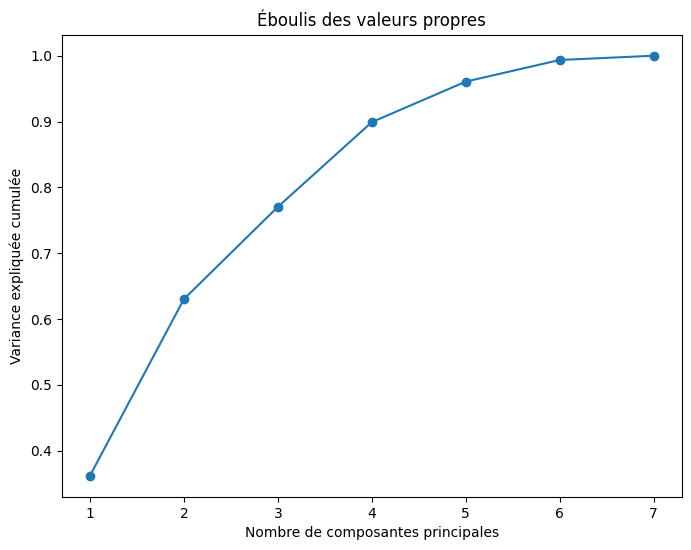

In [92]:
# Application de l'ACP
pca = PCA()
pca.fit(df_acp)

# Création de l'éboulis des valeurs propres
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Éboulis des valeurs propres')
plt.show()

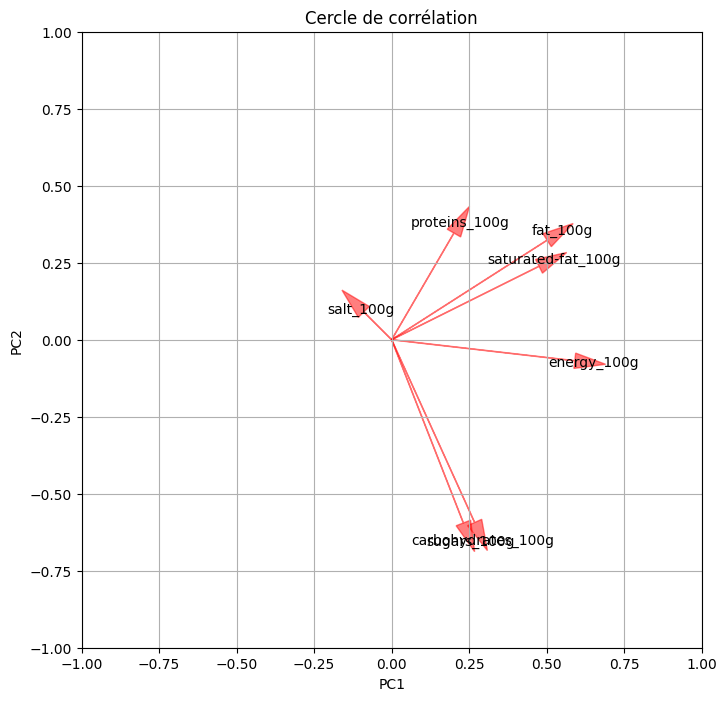

In [93]:
# Cercle de corrélation
pcs = pca.components_
fig, ax = plt.subplots(figsize=(8, 8))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    ax.arrow(0, 0, x, y, color='red', alpha=0.5, head_width=0.05, head_length=0.1)
    ax.text(x * 1.1, y * 1.1, df_acp.columns[i], color='black', ha='center', va='center')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Cercle de corrélation')
ax.grid(True)
plt.show()

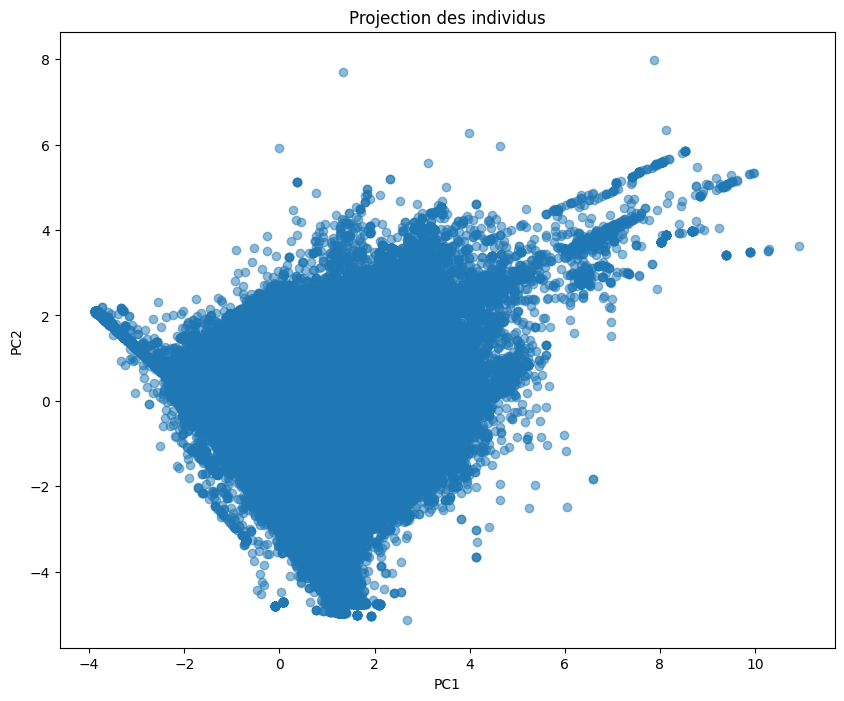

In [94]:
# Projection des individus
X_projected = pca.transform(df_acp)
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_projected[:, 0], X_projected[:, 1], alpha=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Projection des individus')
plt.show()

In [95]:
# Analyse de variance (ANOVA) pour chaque colonne

# Ajout de la colonne 'nutriscore' à df_acp
df_acp['nutriscore'] = df_step9['nutriscore']

# Analyse de variance (ANOVA) pour chaque colonne
from scipy.stats import f_oneway

for col in colonnes_acp:
    groups = [df_acp[df_acp['nutriscore'] == nutri][col] for nutri in ['A', 'B', 'C', 'D', 'E']]
    stat, p = f_oneway(*groups)
    print(f"ANOVA pour {col}:")
    print(f"Statistique F: {stat:.3f}, p-value: {p:.3f}")
    print("---")

ANOVA pour energy_100g:
Statistique F: 38935.798, p-value: 0.000
---
ANOVA pour fat_100g:
Statistique F: 23008.250, p-value: 0.000
---
ANOVA pour saturated-fat_100g:
Statistique F: 43067.625, p-value: 0.000
---
ANOVA pour carbohydrates_100g:
Statistique F: 6393.310, p-value: 0.000
---
ANOVA pour sugars_100g:
Statistique F: 13242.396, p-value: 0.000
---
ANOVA pour proteins_100g:
Statistique F: 3505.589, p-value: 0.000
---
ANOVA pour salt_100g:
Statistique F: 1156.462, p-value: 0.000
---


## Conclusion finale

Dans ce projet, nous avons effectué une analyse approfondie d'un dataset sur les produits alimentaires provenant de Open Food Facts. Nous avons commencé par identifier les features pertinentes et traiter les problèmes de qualité des données, tels que les valeurs manquantes, les doublons et les valeurs aberrantes. Ensuite, nous avons réalisé des analyses univariées, bivariées et multivariées pour explorer les caractéristiques et les relations entre les différentes features.

Nos analyses ont révélé des informations intéressantes sur la distribution des nutriments dans les produits alimentaires et leur lien avec le Nutri-Score. Nous avons constaté que les produits avec un meilleur Nutri-Score avaient tendance à avoir une teneur plus faible en matières grasses, en acides gras saturés et en sucres, tandis que les produits avec un Nutri-Score moins bon avaient des teneurs plus élevées dans ces nutriments.

L'Analyse en Composantes Principales (ACP) nous a permis de visualiser la structure globale de nos données et de comprendre les relations entre les différentes features numériques. L'Analyse de Variance (ANOVA) a confirmé qu'il existait des différences significatives dans les valeurs moyennes des features numériques entre les différentes catégories de Nutri-Score.

En conclusion, ce projet nous a permis de mieux comprendre la composition nutritionnelle des produits alimentaires et les facteurs qui influencent leur qualité nutritionnelle globale, représentée par le Nutri-Score. Ces informations pourraient être utiles pour les consommateurs souhaitant faire des choix alimentaires plus sains, ainsi que pour les professionnels de la santé et les décideurs politiques cherchant à promouvoir une alimentation plus équilibrée.